In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

In [4]:
uploaded=files.upload()

Saving CAR DETAILS (1).csv to CAR DETAILS (1) (1).csv


In [5]:
car_detail=pd.read_csv('CAR DETAILS (1).csv')
car_detail

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [6]:
car_detail.shape

(4340, 8)

In [7]:
car_detail.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [8]:
car_detail=car_detail.rename(columns={'name':'Name', 'year':'Year', 'selling_price':'Selling_Price', 'km_driven':'Km_Driven', 'fuel':'Fuel', 'seller_type':'Seller_Type',
       'transmission':'Transmission', 'owner':'Owner'})

In [9]:
car_detail.head(1)

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner


In [10]:
car_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Selling_Price  4340 non-null   int64 
 3   Km_Driven      4340 non-null   int64 
 4   Fuel           4340 non-null   object
 5   Seller_Type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
car_detail.describe()

,Year,Selling_Price,Km_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [12]:
car_detail.isnull().sum()

Name             0
Year             0
Selling_Price    0
Km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
car_detail.duplicated().sum()

763

In [14]:
car_detail=car_detail.drop_duplicates(keep='first')

In [15]:
car_detail.duplicated().sum()

0

In [16]:
car_detail.shape

(3577, 8)

In [17]:
car_detail['Brand']=car_detail['Name'].str.split().str.get(0)

In [18]:
car_detail['Model']=car_detail['Name'].str.split().str.get(1)+ car_detail.Name.str.split().str.get(2)

In [19]:
car_detail[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti 800 AC,Maruti,800AC
1,Maruti Wagon R LXI Minor,Maruti,WagonR
2,Hyundai Verna 1.6 SX,Hyundai,Verna1.6
3,Datsun RediGO T Option,Datsun,RediGOT
4,Honda Amaze VX i-DTEC,Honda,AmazeVX
...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),Hyundai,i20Magna
4336,Hyundai i20 Magna 1.4 CRDi,Hyundai,i20Magna
4337,Maruti 800 AC BSIII,Maruti,800AC
4338,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6


In [20]:
print(car_detail.Brand.unique())


['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [21]:
print(car_detail.Brand.nunique())

29


In [22]:
car_detail["Brand"].replace({"Land":"Land Rover"}, inplace=True)

In [23]:
print(car_detail.Brand.unique())

['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land Rover' 'Daewoo'
 'MG' 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


In [24]:
car_detail.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3577.0,2012.962538,4.251759,1992.0,2010.0,2013.0,2016.0,2020.0
Selling_Price,3577.0,473912.542074,509301.809816,20000.0,200000.0,350000.0,600000.0,8900000.0
Km_Driven,3577.0,69250.545709,47579.940016,1.0,36000.0,60000.0,90000.0,806599.0


In [25]:
car_detail.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,3577,1491,Maruti Swift Dzire VDI,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,3577.0,NaN,NaN,NaN,2012.962538,4.251759,1992.0,2010.0,2013.0,2016.0,2020.0
Selling_Price,3577.0,NaN,NaN,NaN,473912.542074,509301.809816,20000.0,200000.0,350000.0,600000.0,8900000.0
Km_Driven,3577.0,NaN,NaN,NaN,69250.545709,47579.940016,1.0,36000.0,60000.0,90000.0,806599.0
Fuel,3577,5,Diesel,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller_Type,3577,3,Individual,2832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,3577,2,Manual,3265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,3577,5,First Owner,2218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,3577,29,Maruti,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,3576,612,WagonR,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
car_detail.isnull().sum()

Name             0
Year             0
Selling_Price    0
Km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Brand            0
Model            1
dtype: int64

In [27]:
car_detail[car_detail['Brand']=='OpelCorsa']

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model
2194,OpelCorsa 1.6Gls,2004,142000,73000,Petrol,Individual,Manual,Fourth & Above Owner,OpelCorsa,NaN
3206,OpelCorsa 1.4 GL,2002,35000,100000,Petrol,Individual,Manual,Third Owner,OpelCorsa,1.4GL


In [28]:
null_model_rows = car_detail[car_detail['Model'].isnull()]
null_model_rows

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model
2194,OpelCorsa 1.6Gls,2004,142000,73000,Petrol,Individual,Manual,Fourth & Above Owner,OpelCorsa,NaN


In [29]:
car_detail['Model'].fillna('1.6Gls',inplace=True)
car_detail

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,WagonR
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna1.6
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGOT
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,AmazeVX
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20Magna
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20Magna
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800AC
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta1.6


In [30]:
car_detail

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,WagonR
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna1.6
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGOT
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,AmazeVX
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20Magna
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20Magna
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800AC
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta1.6


In [31]:
car_detail.isnull().sum()

Name             0
Year             0
Selling_Price    0
Km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Brand            0
Model            0
dtype: int64

In [32]:
car_detail.dtypes

Name             object
Year              int64
Selling_Price     int64
Km_Driven         int64
Fuel             object
Seller_Type      object
Transmission     object
Owner            object
Brand            object
Model            object
dtype: object

In [33]:

 cat_cols=car_detail.select_dtypes(include=['object'])
 print(cat_cols)


                                     Name    Fuel Seller_Type Transmission  \
0                           Maruti 800 AC  Petrol  Individual       Manual   
1                Maruti Wagon R LXI Minor  Petrol  Individual       Manual   
2                    Hyundai Verna 1.6 SX  Diesel  Individual       Manual   
3                  Datsun RediGO T Option  Petrol  Individual       Manual   
4                   Honda Amaze VX i-DTEC  Diesel  Individual       Manual   
...                                   ...     ...         ...          ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  Diesel  Individual       Manual   
4336           Hyundai i20 Magna 1.4 CRDi  Diesel  Individual       Manual   
4337                  Maruti 800 AC BSIII  Petrol  Individual       Manual   
4338     Hyundai Creta 1.6 CRDi SX Option  Diesel  Individual       Manual   
4339                     Renault KWID RXT  Petrol  Individual       Manual   

             Owner    Brand     Model  
0      First Owner   Ma

In [34]:
num_cols=car_detail.select_dtypes(include=['int'])
print(num_cols)

      Year  Selling_Price  Km_Driven
0     2007          60000      70000
1     2007         135000      50000
2     2012         600000     100000
3     2017         250000      46000
4     2014         450000     141000
...    ...            ...        ...
4335  2014         409999      80000
4336  2014         409999      80000
4337  2009         110000      83000
4338  2016         865000      90000
4339  2016         225000      40000

[3577 rows x 3 columns]


In [35]:
print(cat_cols)
print(num_cols)

                                     Name    Fuel Seller_Type Transmission  \
0                           Maruti 800 AC  Petrol  Individual       Manual   
1                Maruti Wagon R LXI Minor  Petrol  Individual       Manual   
2                    Hyundai Verna 1.6 SX  Diesel  Individual       Manual   
3                  Datsun RediGO T Option  Petrol  Individual       Manual   
4                   Honda Amaze VX i-DTEC  Diesel  Individual       Manual   
...                                   ...     ...         ...          ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  Diesel  Individual       Manual   
4336           Hyundai i20 Magna 1.4 CRDi  Diesel  Individual       Manual   
4337                  Maruti 800 AC BSIII  Petrol  Individual       Manual   
4338     Hyundai Creta 1.6 CRDi SX Option  Diesel  Individual       Manual   
4339                     Renault KWID RXT  Petrol  Individual       Manual   

             Owner    Brand     Model  
0      First Owner   Ma

Year
Skew : -0.79


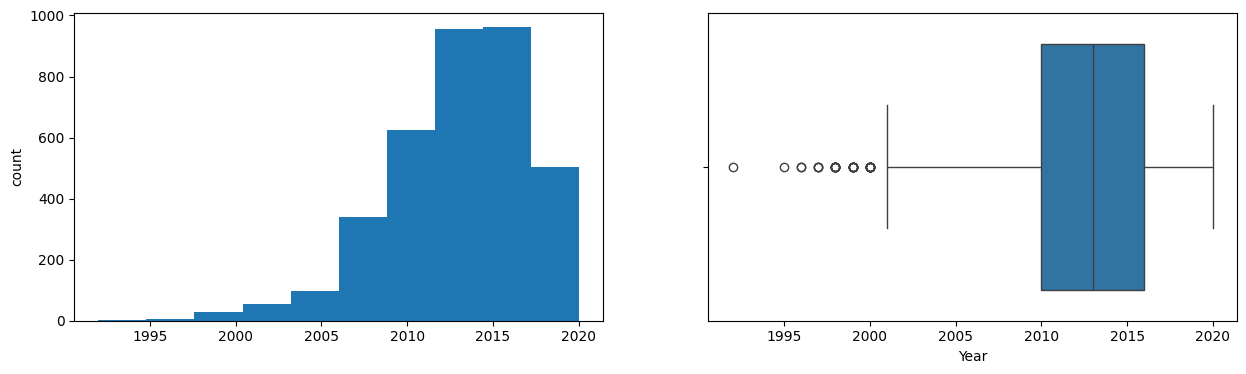

Selling_Price
Skew : 5.45


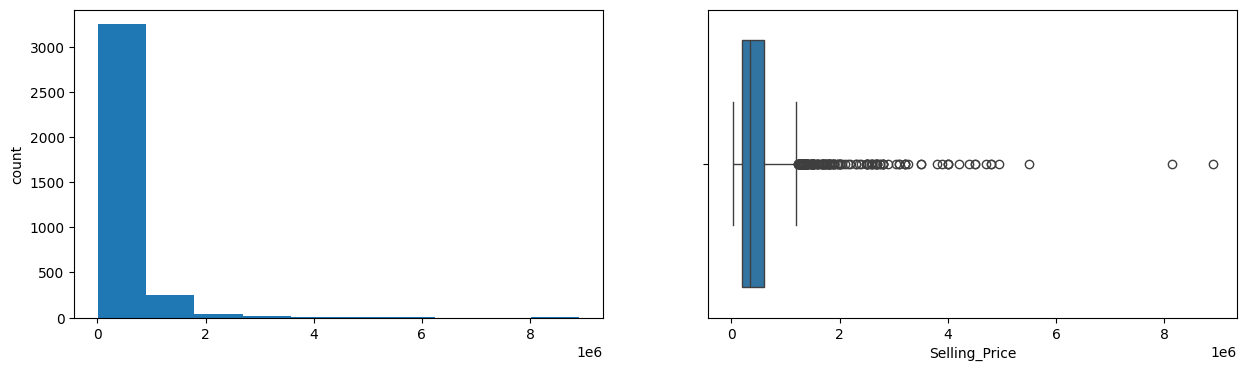

Km_Driven
Skew : 2.55


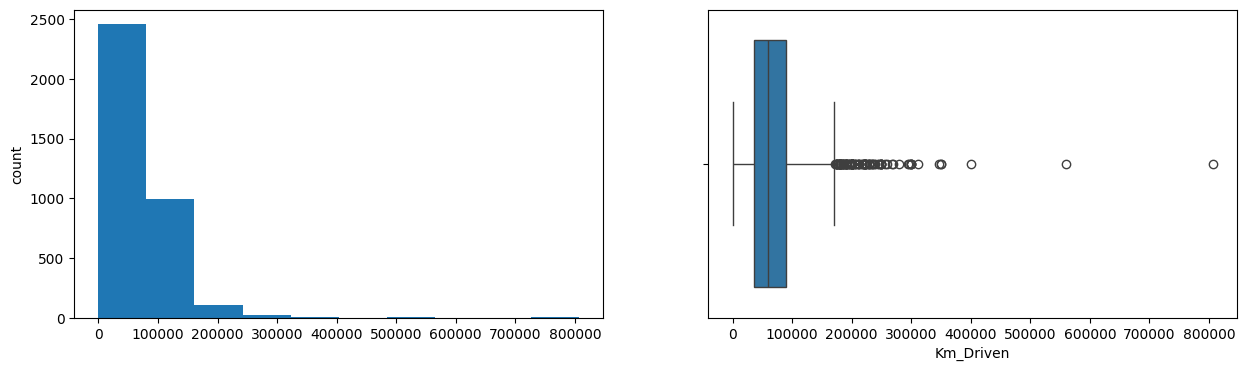

In [36]:
for col in num_cols:
    print(col)
    print('Skew :', round(car_detail[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    car_detail[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=car_detail[col])
    plt.show()

In [37]:
car_detail.columns

Index(['Name', 'Year', 'Selling_Price', 'Km_Driven', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner', 'Brand', 'Model'],
      dtype='object')

In [38]:
# Function for log transformation of the column
def log_transform(car_detail,col):
    for colname in col:
        if (car_detail[colname] == 1.0).all():
            car_detail[colname + '_log'] = np.log(car_detail[colname]+1)
        else:
            car_detail[colname + '_log'] = np.log(car_detail[colname])
    car_detail.info()

In [39]:
log_transform(car_detail,['Km_Driven','Selling_Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3577 non-null   object 
 1   Year               3577 non-null   int64  
 2   Selling_Price      3577 non-null   int64  
 3   Km_Driven          3577 non-null   int64  
 4   Fuel               3577 non-null   object 
 5   Seller_Type        3577 non-null   object 
 6   Transmission       3577 non-null   object 
 7   Owner              3577 non-null   object 
 8   Brand              3577 non-null   object 
 9   Model              3577 non-null   object 
 10  Km_Driven_log      3577 non-null   float64
 11  Selling_Price_log  3577 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 363.3+ KB


<ipython-input-40-a9e38df2fc4d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_detail["Km_Driven_log"], axlabel="Km_Driven_log");


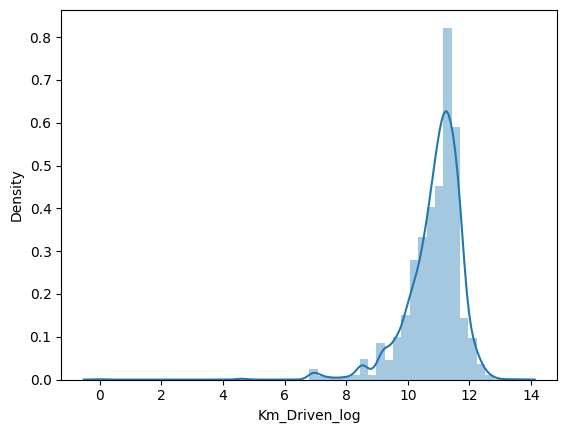

In [40]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(car_detail["Km_Driven_log"], axlabel="Km_Driven_log");

<Figure size 1300x1700 with 0 Axes>

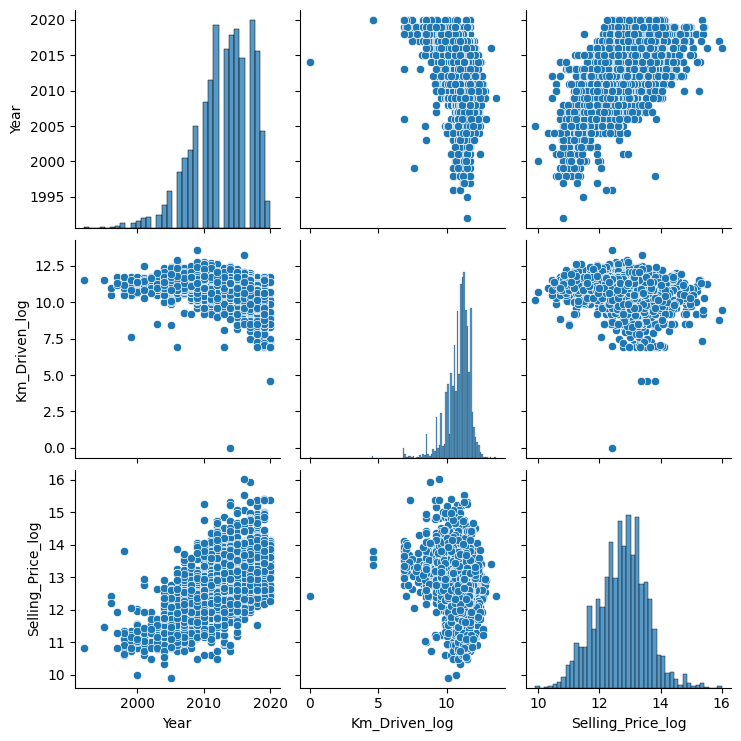

In [41]:
plt.figure(figsize=(13,17))
sns.pairplot(data=car_detail.drop(['Km_Driven','Selling_Price'], axis=1))
plt.show()


In [42]:
from datetime import date
date.today().year
car_detail['Car_Age']=date.today().year-car_detail['Year']
car_detail.head()

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model,Km_Driven_log,Selling_Price_log,Car_Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800AC,11.156251,11.002100,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,WagonR,10.819778,11.813030,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna1.6,11.512925,13.304685,12
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGOT,10.736397,12.429216,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,AmazeVX,11.856515,13.017003,10


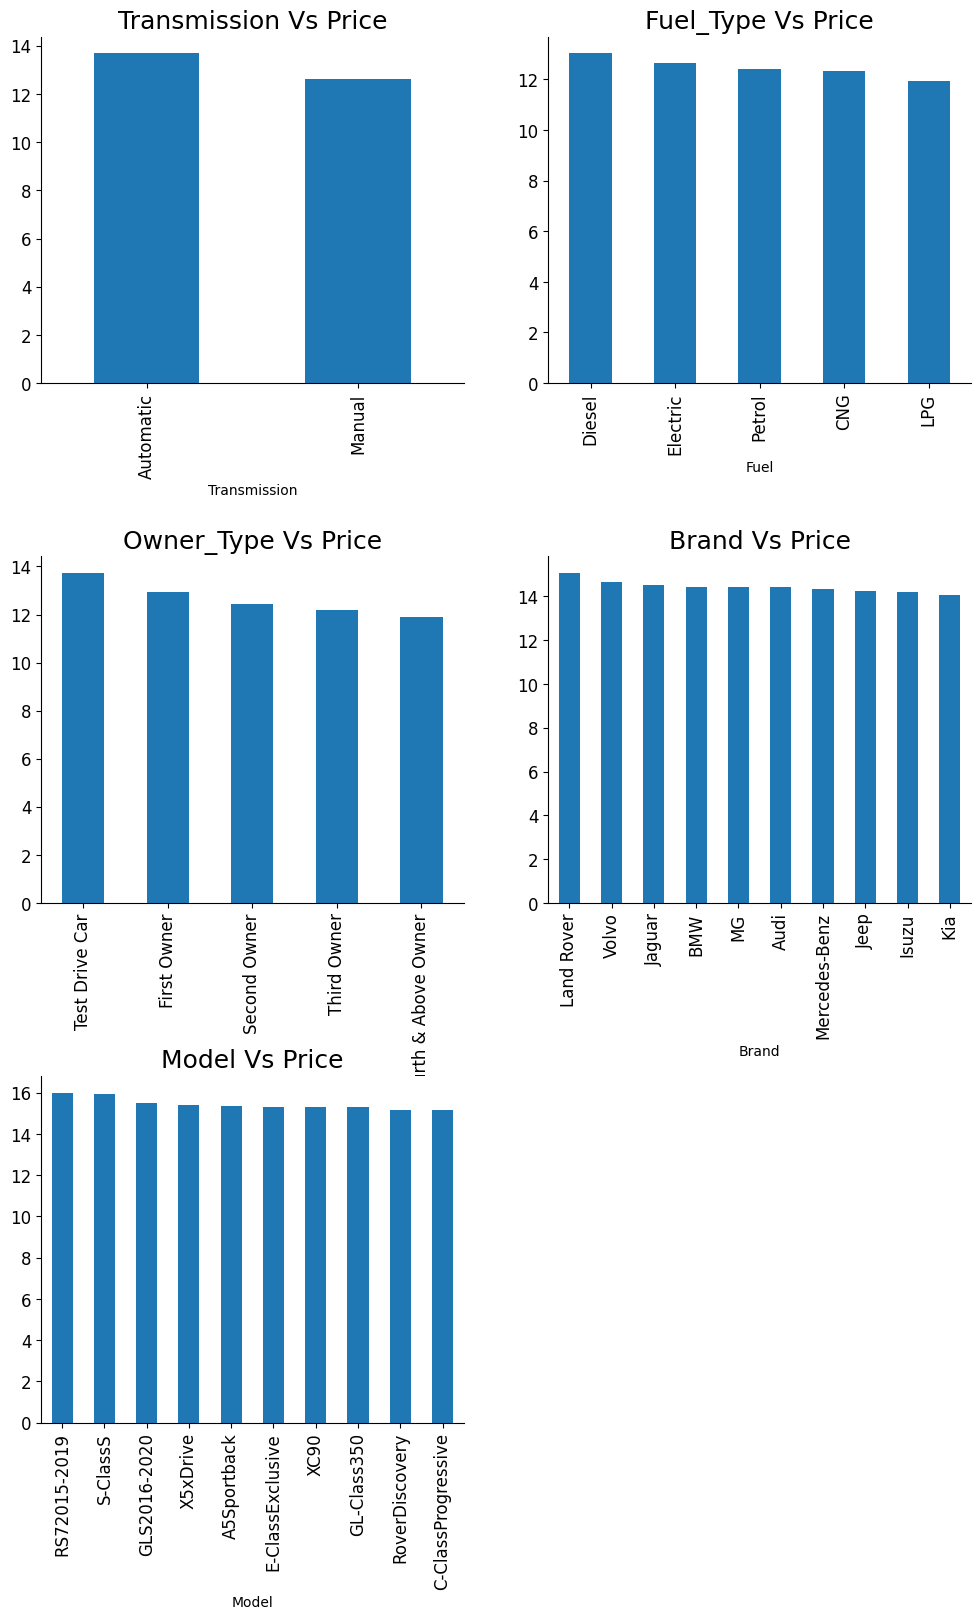

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axarr = plt.subplots(3, 2, figsize=(12, 18))

car_detail.groupby('Transmission')['Selling_Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Transmission Vs Price", fontsize=18)
car_detail.groupby('Fuel')['Selling_Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Fuel_Type Vs Price", fontsize=18)
car_detail.groupby('Owner')['Selling_Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Owner_Type Vs Price", fontsize=18)
car_detail.groupby('Brand')['Selling_Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Brand Vs Price", fontsize=18)
car_detail.groupby('Model')['Selling_Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Model Vs Price", fontsize=18)

# Hide the empty subplot
axarr[2][1].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.2)
sns.despine()
plt.show()


<ipython-input-44-26d50d1018af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_detail.drop(['Km_Driven','Selling_Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)


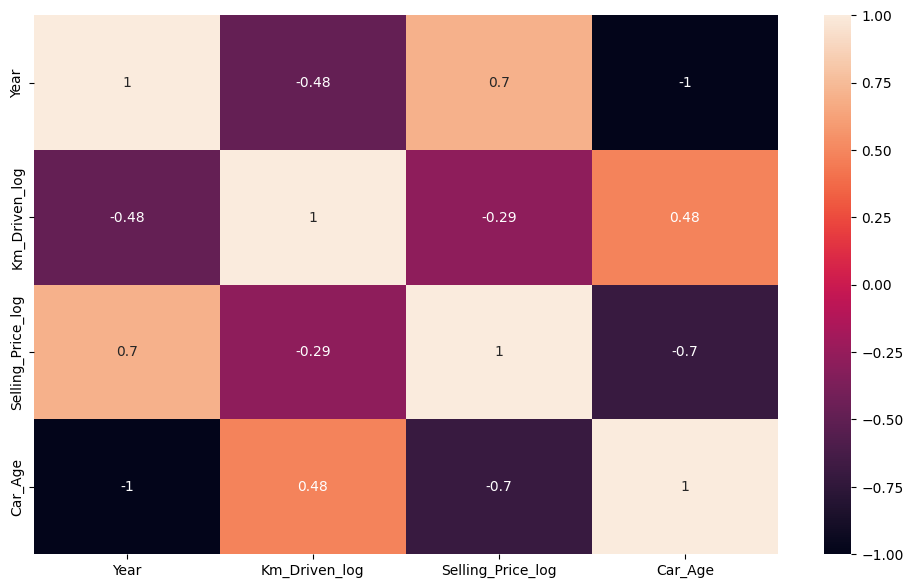

In [44]:
plt.figure(figsize=(12, 7))
sns.heatmap(car_detail.drop(['Km_Driven','Selling_Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [45]:
car_detail.describe()

,Year,Selling_Price,Km_Driven,Km_Driven_log,Selling_Price_log,Car_Age
count,3577.000000,3.577000e+03,3577.000000,3577.000000,3577.000000,3577.000000
mean,2012.962538,4.739125e+05,69250.545709,10.868638,12.730341,11.037462
std,4.251759,5.093018e+05,47579.940016,0.892314,0.817210,4.251759
min,1992.000000,2.000000e+04,1.000000,0.000000,9.903488,4.000000
25%,2010.000000,2.000000e+05,36000.000000,10.491274,12.206073,8.000000
50%,2013.000000,3.500000e+05,60000.000000,11.002100,12.765688,11.000000
75%,2016.000000,6.000000e+05,90000.000000,11.407565,13.304685,14.000000
max,2020.000000,8.900000e+06,806599.000000,13.600582,16.001562,32.000000


In [46]:
car_detail.head(1)

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model,Km_Driven_log,Selling_Price_log,Car_Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800AC,11.156251,11.0021,17


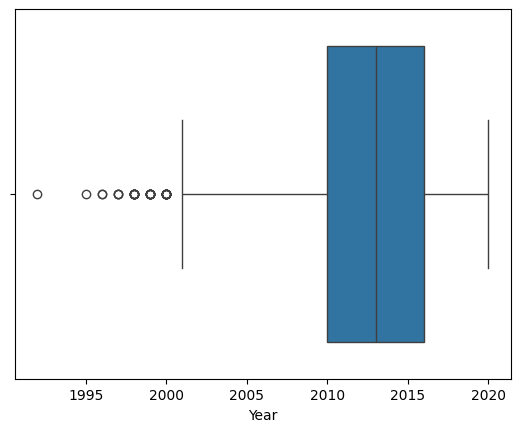

In [47]:
sns.boxplot(data=car_detail,x='Year')
plt.show()

In [48]:
q1=car_detail['Year'].quantile(0.25)
print(q1)

2010.0


In [49]:
q3=car_detail['Year'].quantile(0.75)
print(q3)

2016.0


In [50]:
iqr=q3-q1
print(iqr)

6.0


In [51]:
upper_limit=q1+1.5*iqr
lower_limit=q3-1.5*iqr

In [52]:
print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

Upper_limit 2019.0
Lower_limit 2007.0


In [53]:
car_de_2=car_detail[car_detail['Year']>lower_limit]

In [54]:
car_detail[car_detail['Year']<upper_limit]

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model,Km_Driven_log,Selling_Price_log,Car_Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800AC,11.156251,11.002100,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,WagonR,10.819778,11.813030,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna1.6,11.512925,13.304685,12
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGOT,10.736397,12.429216,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,AmazeVX,11.856515,13.017003,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20Magna,11.289782,12.923910,10
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20Magna,11.289782,12.923910,10
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800AC,11.326596,11.608236,15
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Creta1.6,11.407565,13.670485,8


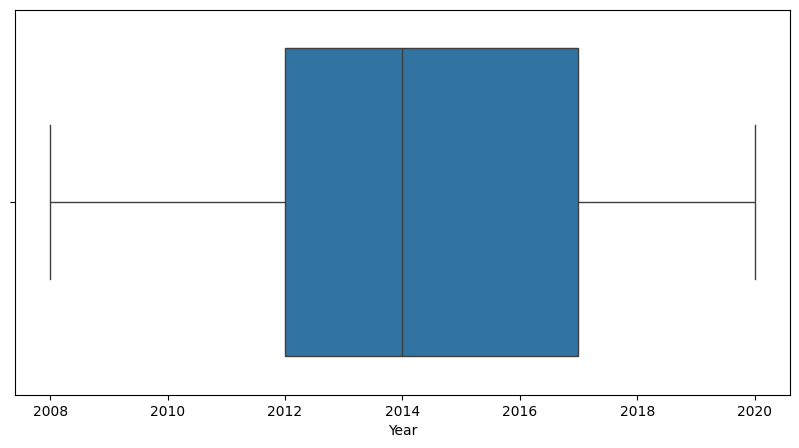

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(x=car_de_2['Year'])
plt.show()

In [56]:
car_de_2['Km_Driven'].describe()

count      3175.000000
mean      66512.177953
std       47030.280288
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: Km_Driven, dtype: float64

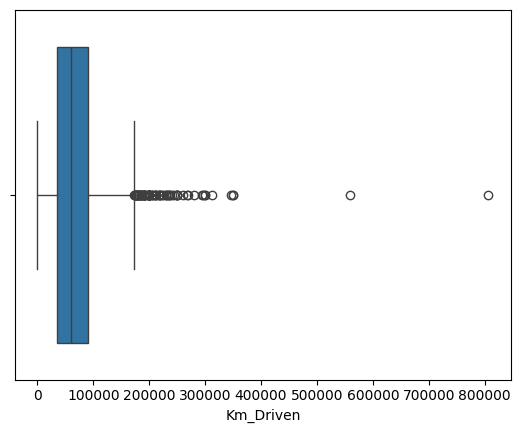

In [57]:
sns.boxplot(data=car_de_2,x='Km_Driven')
plt.show()

In [58]:
q1=car_detail['Km_Driven'].quantile(0.25)
print(q1)
q3=car_detail['Km_Driven'].quantile(0.75)
print(q3)
iqr=q3-q1
print(iqr)

36000.0
90000.0
54000.0


In [59]:
upper_limit=q1+1.5*iqr
lower_limit=q3-1.5*iqr

In [60]:
print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

Upper_limit 117000.0
Lower_limit 9000.0


In [61]:
car_de_3=car_detail[car_detail['Km_Driven']<upper_limit]

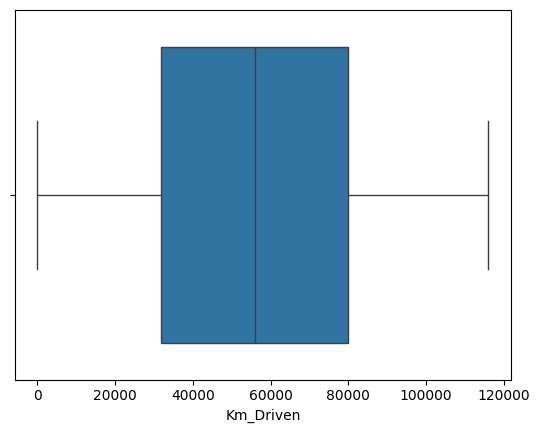

In [62]:
sns.boxplot(data=car_de_3,x='Km_Driven')
plt.show()

In [63]:
car_de_3['Selling_Price'].describe()

count    3.086000e+03
mean     4.924073e+05
std      5.319219e+05
min      2.000000e+04
25%      2.100000e+05
50%      3.600000e+05
75%      6.000000e+05
max      8.900000e+06
Name: Selling_Price, dtype: float64

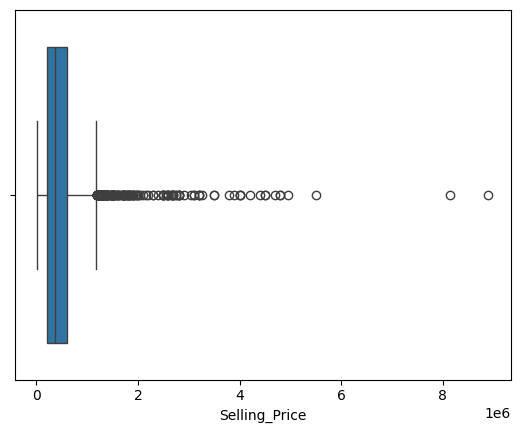

In [64]:
sns.boxplot(data=car_de_3,x='Selling_Price')
plt.show()

In [65]:
q1=car_de_3['Selling_Price'].quantile(0.25)
print(q1)
q3=car_de_3['Selling_Price'].quantile(0.75)
print(q3)
iqr=q3-q1
print(iqr)

210000.0
600000.0
390000.0


In [66]:
upper_limit=q1+1.5*iqr
lower_limit=q3-1.5*iqr
print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

Upper_limit 795000.0
Lower_limit 15000.0


In [67]:
car_de_4=car_de_3[car_de_3['Selling_Price']<upper_limit]

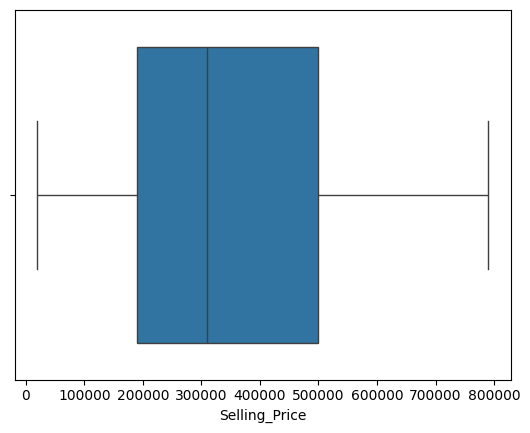

In [68]:
sns.boxplot(data=car_de_4,x='Selling_Price')
plt.show()

In [69]:
car_de_4.to_csv('Eda.csv')

In [70]:
car_de_4.columns

Index(['Name', 'Year', 'Selling_Price', 'Km_Driven', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner', 'Brand', 'Model', 'Km_Driven_log',
       'Selling_Price_log', 'Car_Age'],
      dtype='object')

In [71]:
cat_cols.columns

Index(['Name', 'Fuel', 'Seller_Type', 'Transmission', 'Owner', 'Brand',
       'Model'],
      dtype='object')

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
import pandas as pd
encoded_features = pd.get_dummies(car_de_4[['Fuel', 'Seller_Type', 'Transmission','Owner','Brand','Model']], drop_first=True)

In [74]:
encoded_features

,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,...,Model_i10Magna,Model_i10Sportz,Model_i201.2,Model_i201.4,Model_i202015-2017,Model_i20Active,Model_i20Asta,Model_i20Magna,Model_i20Sportz,Model_redi-GOAMT
0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4335,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4336,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4337,0,0,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:

car_detail_encoded = pd.concat([car_de_4, encoded_features], axis=1)


In [76]:
car_detail_encoded

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model,...,Model_i10Magna,Model_i10Sportz,Model_i201.2,Model_i201.4,Model_i202015-2017,Model_i20Active,Model_i20Asta,Model_i20Magna,Model_i20Sportz,Model_redi-GOAMT
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800AC,...,0,0,0,0,0,0,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,WagonR,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna1.6,...,0,0,0,0,0,0,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGOT,...,0,0,0,0,0,0,0,0,0,0
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner,Hyundai,Xcent1.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,Maruti Ritz VDi,2012,225000,90000,Diesel,Individual,Manual,Second Owner,Maruti,RitzVDi,...,0,0,0,0,0,0,0,0,0,0
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20Magna,...,0,0,0,0,0,0,0,1,0,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,i20Magna,...,0,0,0,0,0,0,0,1,0,0
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,800AC,...,0,0,0,0,0,0,0,0,0,0


In [77]:

car_detail_encoded.drop(['Fuel', 'Seller_Type', 'Transmission','Owner','Brand','Model'], axis=1, inplace=True)


In [78]:
car_detail_encoded.drop(['Name'], axis=1, inplace=True)

In [79]:
car_detail_encoded

,Year,Selling_Price,Km_Driven,Km_Driven_log,Selling_Price_log,Car_Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,...,Model_i10Magna,Model_i10Sportz,Model_i201.2,Model_i201.4,Model_i202015-2017,Model_i20Active,Model_i20Asta,Model_i20Magna,Model_i20Sportz,Model_redi-GOAMT
0,2007,60000,70000,11.156251,11.002100,17,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,10.819778,11.813030,17,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000,100000,11.512925,13.304685,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000,46000,10.736397,12.429216,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2016,550000,25000,10.126631,13.217674,8,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,2012,225000,90000,11.407565,12.323856,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4335,2014,409999,80000,11.289782,12.923910,10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4336,2014,409999,80000,11.289782,12.923910,10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4337,2009,110000,83000,11.326596,11.608236,15,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [81]:
standard_scaler = StandardScaler()

In [82]:

car_detail_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(car_detail_encoded), columns=car_detail_encoded.columns)

In [83]:
car_detail_standard_scaled

,Year,Selling_Price,Km_Driven,Km_Driven_log,Selling_Price_log,Car_Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,...,Model_i10Magna,Model_i10Sportz,Model_i201.2,Model_i201.4,Model_i202015-2017,Model_i20Active,Model_i20Asta,Model_i20Magna,Model_i20Sportz,Model_redi-GOAMT
0,-1.378957,-1.482790,0.396006,0.475981,-2.323088,1.378957,-0.822535,-0.019415,-0.082635,0.858435,...,-0.10138,-0.080291,-0.089307,-0.067394,-0.027462,-0.075392,-0.10326,-0.080291,-0.067394,-0.019415
1,-1.378957,-1.095430,-0.299638,0.051567,-1.117450,1.378957,-0.822535,-0.019415,-0.082635,0.858435,...,-0.10138,-0.080291,-0.089307,-0.067394,-0.027462,-0.075392,-0.10326,-0.080291,-0.067394,-0.019415
2,-0.192113,1.306206,1.439471,0.925878,1.100244,0.192113,1.215754,-0.019415,-0.082635,-1.164910,...,-0.10138,-0.080291,-0.089307,-0.067394,-0.027462,-0.075392,-0.10326,-0.080291,-0.067394,-0.019415
3,0.994731,-0.501477,-0.438767,-0.053608,-0.201345,-0.994731,-0.822535,-0.019415,-0.082635,0.858435,...,-0.10138,-0.080291,-0.089307,-0.067394,-0.027462,-0.075392,-0.10326,-0.080291,-0.067394,-0.019415
4,0.757362,1.047965,-1.169193,-0.822745,0.970882,-0.757362,-0.822535,-0.019415,-0.082635,0.858435,...,-0.10138,-0.080291,-0.089307,-0.067394,-0.027462,-0.075392,-0.10326,-0.080291,-0.067394,-0.019415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,-0.192113,-0.630597,1.091650,0.792980,-0.357988,0.192113,1.215754,-0.019415,-0.082635,-1.164910,...,-0.10138,-0.080291,-0.089307,-0.067394,-0.027462,-0.075392,-0.10326,-0.080291,-0.067394,-0.019415
2650,0.282625,0.324887,0.743828,0.644413,0.534133,-0.282625,1.215754,-0.019415,-0.082635,-1.164910,...,-0.10138,-0.080291,-0.089307,-0.067394,-0.027462,-0.075392,-0.10326,12.454624,-0.067394,-0.019415
2651,0.282625,0.324887,0.743828,0.644413,0.534133,-0.282625,1.215754,-0.019415,-0.082635,-1.164910,...,-0.10138,-0.080291,-0.089307,-0.067394,-0.027462,-0.075392,-0.10326,12.454624,-0.067394,-0.019415
2652,-0.904220,-1.224550,0.848174,0.690849,-1.421925,0.904220,-0.822535,-0.019415,-0.082635,0.858435,...,-0.10138,-0.080291,-0.089307,-0.067394,-0.027462,-0.075392,-0.10326,-0.080291,-0.067394,-0.019415


In [84]:
car_detail_standard_scaled.to_csv('cars_modify.csv', index = False)

In [85]:
X=car_detail_standard_scaled.drop(['Selling_Price','Selling_Price_log','Km_Driven_log'],axis=1)
y=car_detail_standard_scaled['Selling_Price']

In [86]:
X.columns

Index(['Year', 'Km_Driven', 'Car_Age', 'Fuel_Diesel', 'Fuel_Electric',
       'Fuel_LPG', 'Fuel_Petrol', 'Seller_Type_Individual',
       'Seller_Type_Trustmark Dealer', 'Transmission_Manual',
       ...
       'Model_i10Magna', 'Model_i10Sportz', 'Model_i201.2', 'Model_i201.4',
       'Model_i202015-2017', 'Model_i20Active', 'Model_i20Asta',
       'Model_i20Magna', 'Model_i20Sportz', 'Model_redi-GOAMT'],
      dtype='object', length=509)

In [87]:
print(y)

0      -1.482790
1      -1.095430
2       1.306206
3      -0.501477
4       1.047965
          ...   
2649   -0.630597
2650    0.324887
2651    0.324887
2652   -1.224550
2653   -0.630597
Name: Selling_Price, Length: 2654, dtype: float64


In [95]:
# first  make a copy of the dataset
df = car_de_4.copy()


In [97]:
# encoding categorical columns
from sklearn.preprocessing import LabelEncoder ,StandardScaler
lb = LabelEncoder()

for column in cat_cols:
  df[column] =  lb.fit_transform(df[column])

In [116]:
df.to_csv('cars_modify_1.csv', index = False)

In [117]:
df1 = pd.read_csv('cars_modify_1.csv')
df1.head()

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Brand,Model,Km_Driven_log,Selling_Price_log,Car_Age
0,569,2007,60000,70000,4,1,1,0,12,4,11.156251,11.002100,17
1,809,2007,135000,50000,4,1,1,0,12,438,10.819778,11.813030,17
2,379,2012,600000,100000,1,1,1,0,10,429,11.512925,13.304685,12
3,69,2017,250000,46000,4,1,1,0,5,313,10.736397,12.429216,7
4,409,2016,550000,25000,4,1,1,0,10,445,10.126631,13.217674,8


In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR

def compare_models(x_train, y_train, x_test, y_test, models):
    results = []

    for model_name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        results.append((model_name, mae, mse, rmse, r2))

    result_df = pd.DataFrame(
            results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R-squared']
    )
    result_df = result_df.sort_values(by="R-squared", ascending=False)
    return result_df

def evaluate_model(df):
    x = df.drop(["Selling_Price",'Selling_Price_log','Km_Driven_log'], axis=1)
    y = df["Selling_Price"]

    x_test, x_train, y_test, y_train = train_test_split(
        x, y, test_size=0.3, random_state=42
    )

    sc = StandardScaler()
    sc.fit_transform(x_train)
    sc.transform(x_test)

    models = [
        ("Linear Regression", LinearRegression()),
        ("Random Forest Regressor", RandomForestRegressor()),
        ("Support Vector Regressor", SVR()),
        ("Bagging Regressor", BaggingRegressor())
        ]

    results_df = compare_models(x_train, y_train, x_test, y_test, models)

    print("Comparison of Regression Models:")
    print(results_df)

    best_model = models[0][1]  # Best model is the first model in the sorted list

    return best_model

In [119]:
df = pd.read_csv('cars_modify_1.csv')

In [120]:
best_model = evaluate_model(df)
best_model

Comparison of Regression Models:
                      Model            MAE           MSE           RMSE  \
1   Random Forest Regressor   73859.165053  1.019276e+10  100959.214360   
3         Bagging Regressor   76669.083683  1.094997e+10  104642.092624   
0         Linear Regression  104360.639334  1.684989e+10  129807.143864   
2  Support Vector Regressor  160343.492736  3.695871e+10  192246.484612   

   R-squared  
1   0.722511  
3   0.701897  
0   0.541276  
2  -0.006169  


LinearRegression()

In [121]:
import pickle
# Save the model
# Save the model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [125]:
# Load necessary libraries
import pandas as pd
import pickle
import random

# Load the car details dataset
cars_modify = pd.read_csv('cars_modify_1.csv')

# Pick 20 random data points
random_data = random.sample(list(cars_modify.index), 20)

# Load the saved model
loaded_model = pickle.load(open('best_model.pkl', 'rb'))

# Remove the target variable 'selling_price' if present
new_data = cars_modify.drop(["Selling_Price",'Selling_Price_log','Km_Driven_log'], axis=1, errors='ignore')

# Extract actual selling prices
actual_selling_prices = cars_modify.loc[random_data, 'Selling_Price']

# Apply the model to the random data
predictions = loaded_model.predict(new_data.loc[random_data])

# Calculate the percentage difference
percentage_difference = ((predictions - actual_selling_prices) / actual_selling_prices) * 100

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Actual Selling Price': actual_selling_prices,
    'Predicted Selling Price': predictions,
    'Percentage Difference': percentage_difference
})

# Print the results
print(results_df)

      Actual Selling Price  Predicted Selling Price  Percentage Difference
152                 170000            269806.150079              58.709500
1170                375000            517962.533106              38.123342
1154                590000            581291.898627              -1.475949
1888                575000            473326.721797             -17.682309
2432                475000            455007.928653              -4.208857
1666                240000            433013.946099              80.422478
1665                 80000            101361.651157              26.702064
1001                220000            407499.204184              85.226911
881                 300000            510054.290990              70.018097
1061                125000            193412.044710              54.729636
1444                160000            361879.304303             126.174565
1105                180000            315656.804509              75.364891
1393                22000